In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"/content/drive/MyDrive/diminos_data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [7]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


# **Converting the Date Time columns into Date time objects** **bold text**

In [8]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])

In [9]:
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [11]:
df["order_placed_at"].dt.year #for year

0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
14995    2023
14996    2023
14997    2023
14998    2023
14999    2023
Name: order_placed_at, Length: 15000, dtype: int64

In [12]:
df["order_placed_at"].dt.month #for month

0        3
1        3
2        3
3        3
4        3
        ..
14995    3
14996    3
14997    3
14998    3
14999    3
Name: order_placed_at, Length: 15000, dtype: int64

In [13]:
df["order_placed_at"].dt.week #for week of the year

<ipython-input-13-c9559521708c>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["order_placed_at"].dt.week #for week of the year


0         9
1         9
2         9
3         9
4         9
         ..
14995    13
14996    13
14997    13
14998    13
14999    13
Name: order_placed_at, Length: 15000, dtype: int64

In [14]:
df["order_placed_at"].dt.day_of_week #for day of the week

0        2
1        2
2        2
3        2
4        2
        ..
14995    0
14996    0
14997    0
14998    0
14999    0
Name: order_placed_at, Length: 15000, dtype: int64

In [15]:
df["order_placed_at"].dt.day #for day of the month

0         1
1         1
2         1
3         1
4         1
         ..
14995    27
14996    27
14997    27
14998    27
14999    27
Name: order_placed_at, Length: 15000, dtype: int64

<Axes: >

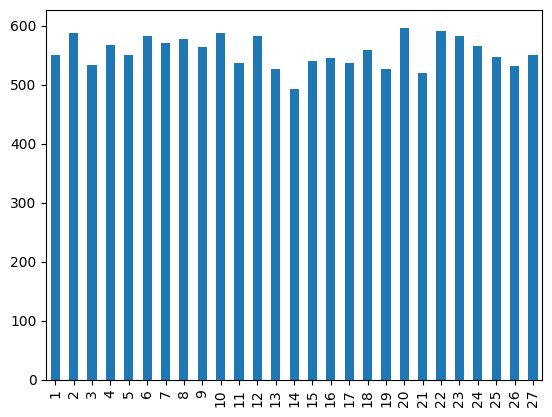

In [16]:
df["order_placed_at"].dt.day.value_counts().sort_index().plot(kind="bar")

<Axes: >

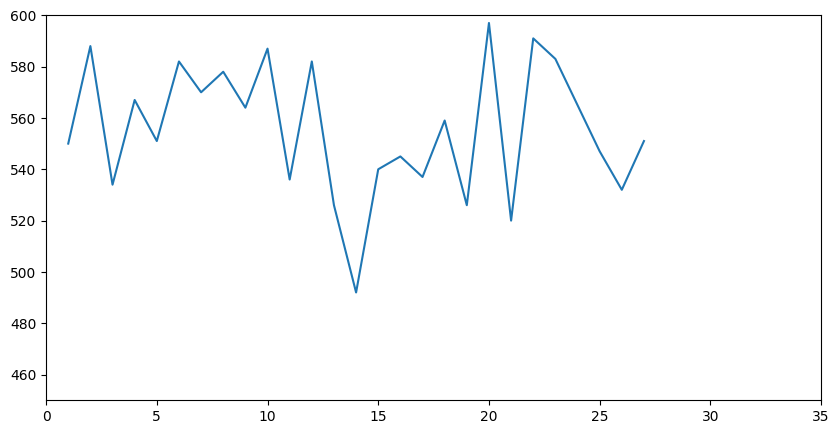

In [17]:
plt.figure(figsize = (10,5))

plt.ylim(450, 600)
plt.xlim(0, 35)

df["order_placed_at"].dt.day.value_counts().sort_index().plot(kind="line")

In [18]:
df["day_name"] = df["order_placed_at"].dt.day_name() #for name of the day

<Axes: >

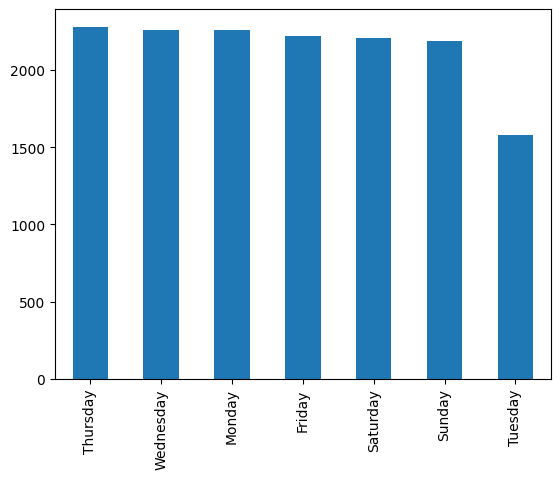

In [19]:
df["day_name"].value_counts().plot(kind = "bar")

In [20]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_name
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
 3   day_name            15000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 468.9+ KB


In [22]:
df["day_name"].value_counts()

Thursday     2280
Wednesday    2259
Monday       2256
Friday       2223
Saturday     2209
Sunday       2191
Tuesday      1582
Name: day_name, dtype: int64

In [23]:
df["delivered_time"] = df["order_delivered_at"] - df["order_placed_at"]

In [24]:
df.head()

,order_id,order_placed_at,order_delivered_at,day_name,delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,0 days 00:16:10.619056


In [25]:
df["delivered_time"] = df["delivered_time"].dt.total_seconds()/60

In [26]:
df["delivered_time"].mean()

20.49938932646778

In [27]:
df["delivered_time"].median()

15.797986066666668

In [28]:
df["delivered_time"].std()

96.16036180216479

In [29]:
df["delivered_time"].quantile(.25)

15.274825995833334

In [30]:
df["delivered_time"].quantile(.75)

17.27966090416667

<Axes: >

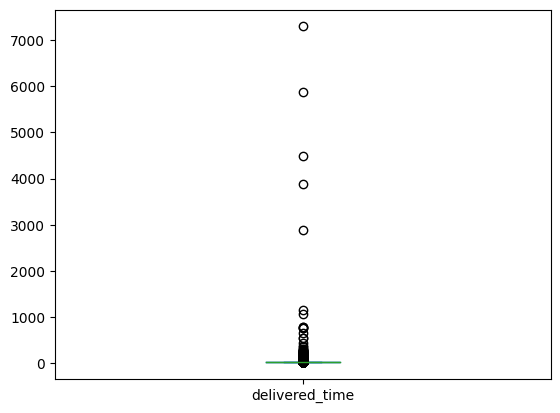

In [31]:
df["delivered_time"].plot(kind="box")

In [32]:
df[df["delivered_time"] > 40].shape

(331, 5)

## **Let us say that we received an update that the delivery time could not be more than 40. We shall replace all the values greater than 40 with 40.**

In [33]:
df["delivered_time"] = [40 if x>40 else x for x in df["delivered_time"]]

In [34]:
df[df["delivered_time"] > 40].shape

(0, 5)

In [35]:
df["delivered_time"].shape

(15000,)

<Axes: >

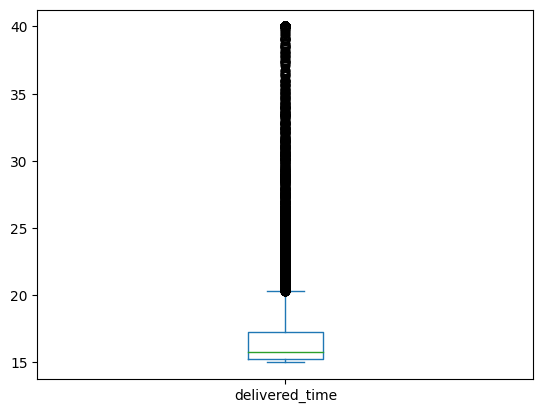

In [36]:
df["delivered_time"].plot(kind="box")

In [37]:
df["delivered_time"].quantile(0.95)

27.261043996666658

# **Since the 95th Percentile on Order Delivery time is than 31 mins, the store's performance is good and the owner need not worry.**